In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("ha_data.csv", sep=";")
df.head()

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1


Посчитаем для начала, по какому проценту из показываемых баннеров кликают пользователи в текущей модели рандомного показа одного из пяти баннеров -- коэффициент кликабельности:

In [5]:
show_to_click_ratio = df[df["title"] == "banner_click"].shape[0] / df[df["title"] == "banner_show"].shape[0] * 100
print(f"show_to_click_ratio: {round(show_to_click_ratio, 2)}")

show_to_click_ratio: 11.22


Найдём конверсию из показа в клики по каждому рекламируемому продукту:

In [6]:
for product in df["product"].unique():
    print(f"show_to_click_ratio {product}: {(df[(df["product"] == product) & (df["title"] == "banner_click")].shape[0]/
df[(df["product"] == product) & (df["title"] == "banner_show")].shape[0]) * 100:.2f}")

show_to_click_ratio company: 9.16
show_to_click_ratio sneakers: 12.57
show_to_click_ratio sports_nutrition: 9.89
show_to_click_ratio accessories: 9.46
show_to_click_ratio clothes: 15.18


In [7]:
df[(df["title"] == "banner_click")| (df["title"] == "banner_show")].groupby(["product", "title"])["title"].count()

product           title       
accessories       banner_click     136254
                  banner_show     1440954
clothes           banner_click     220595
                  banner_show     1453128
company           banner_click     144821
                  banner_show     1580238
sneakers          banner_click     182597
                  banner_show     1453029
sports_nutrition  banner_click     144918
                  banner_show     1465970
Name: title, dtype: int64

In [8]:
d1 = df[(df["title"] == "banner_click")| (df["title"] == "banner_show")].groupby(["product", "title"])["title"].count()

Визуализируем это:

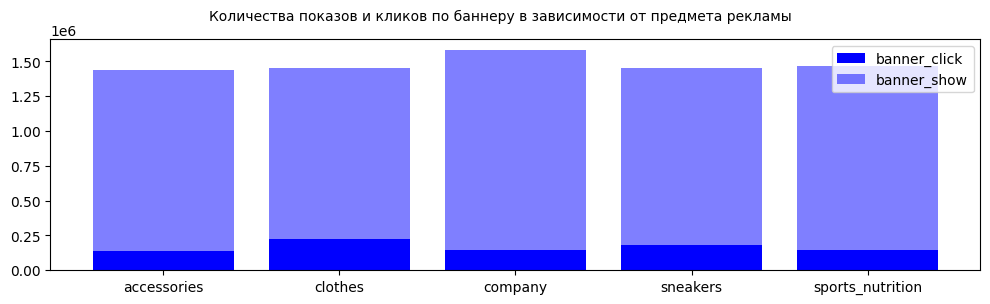

In [9]:
fig, ax = plt.subplots(figsize = (12, 3))
for i, name in zip(range(10), sorted(list(df["product"].unique()))):
    ax.bar(name, d1.iloc[2*i], color = "blue", label = "banner_click" if i == 0 else None)
    ax.bar(name, d1.iloc[2*i + 1], color = "blue", alpha=0.5, label = "banner_show" if i == 0 else None)
ax.legend()
fig.suptitle("Количества показов и кликов по баннеру в зависимости от предмета рекламы", fontsize = 10)
plt.show()

Посмотрим, как распределены клики по объекту баннера (предположим, что показываются разные баннеры с примерно одинаковой частотой):

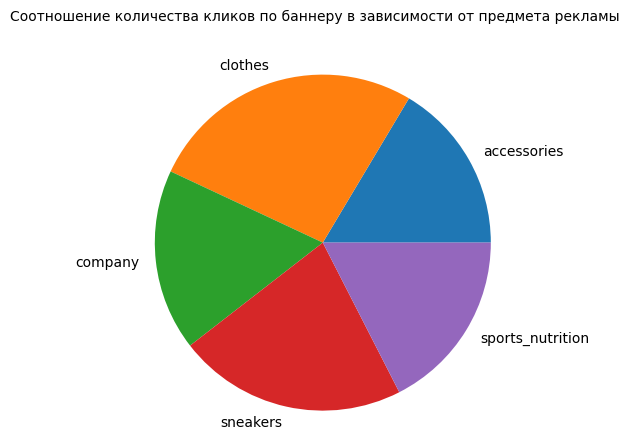

In [10]:
labels = sorted(list(df["product"].unique()))
sizes = list(df[df["title"] == "banner_click"].groupby("product")["title"].count()) 

plt.pie(sizes,labels=labels)

plt.axis('equal')
plt.suptitle("Соотношение количества кликов по баннеру в зависимости от предмета рекламы", fontsize = 10)
plt.show()

In [11]:
df["site_version"].isna().sum()

0

Найдём конверсию из показа в клики по версиям сайта:

In [12]:
df[(df["title"] == "banner_click")| (df["title"] == "banner_show")].groupby(["site_version", "title"])["title"].count()

site_version  title       
desktop       banner_click     115065
              banner_show     2134640
mobile        banner_click     714120
              banner_show     5258679
Name: title, dtype: int64

In [13]:
for version in df["site_version"].unique():
    print(f"show_to_click_ratio {version}: {(df[(df["site_version"] == version) & (df["title"] == "banner_click")].shape[0]/
df[(df["site_version"] == version) & (df["title"] == "banner_show")].shape[0]) * 100:.2f}")

show_to_click_ratio mobile: 13.58
show_to_click_ratio desktop: 5.39


Визуализируем зависимости количества кликов от версии сайта:

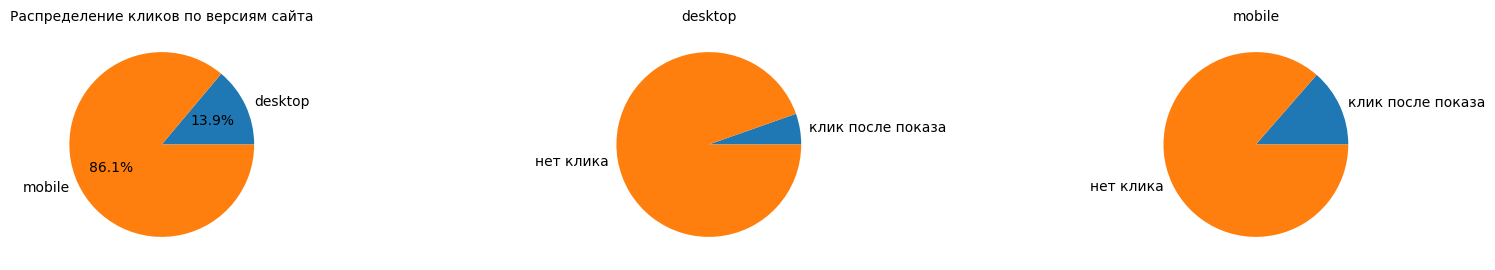

In [14]:
fig, ax = plt.subplots(1, 3, figsize = (20,3))
ax[0].pie(list(df[df["title"] == "banner_click"].groupby(["site_version"])["title"].count()),
          labels=["desktop", "mobile"], autopct='%1.1f%%')
ax[0].set_title("Распределение кликов по версиям сайта", fontsize='medium')
for i in [1, 2]:
    clicks = list(df[df["title"] == "banner_click"].groupby("site_version")["title"].count())[i - 1]
    show = list(df[df["title"] == "banner_show"].groupby("site_version")["title"].count())[i - 1]
    sizes = [clicks, show - clicks]
    ax[i].pie(sizes,labels=["клик после показа", "нет клика"])
    ax[i].set_title(f"{sorted(list(df["site_version"].unique()))[i - 1]}", fontsize='medium')
plt.show()

Сделаем то же самое в зависимости от времени, поделив сутки на "утро", "день", "вечер" и "ночь":

In [15]:
df["time"].isna().sum()

0

In [23]:
data = df.copy()
data["hour"] = pd.to_datetime(df["time"]).dt.hour
x = data["hour"]
condlist = [x < 5, x < 12, x < 18, x <= 23]
choicelist = ["ночь", "утро", "день", "вечер"]
data["time_flag"] = np.select(condlist, choicelist)
data.head()

,order_id,page_id,product,site_version,time,title,user,hour,time_flag
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0,20,вечер
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0,10,утро
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1,13,день
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1,15,день
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1,13,день


In [27]:
for time in data["time_flag"].unique():
    print(f"show_to_click_ratio {time}: {(data[(data["time_flag"] == time) & (data["title"] == "banner_click")].shape[0]/
data[(data["time_flag"] == time) & (data["title"] == "banner_show")].shape[0]) * 100:.2f}")

show_to_click_ratio вечер: 11.32
show_to_click_ratio утро: 11.19
show_to_click_ratio день: 11.19
show_to_click_ratio ночь: 11.09


In [44]:
d2 = data[(data["title"] == "banner_click")|(data["title"] == "banner_show")].groupby(["time_flag", "title"])["title"].count()

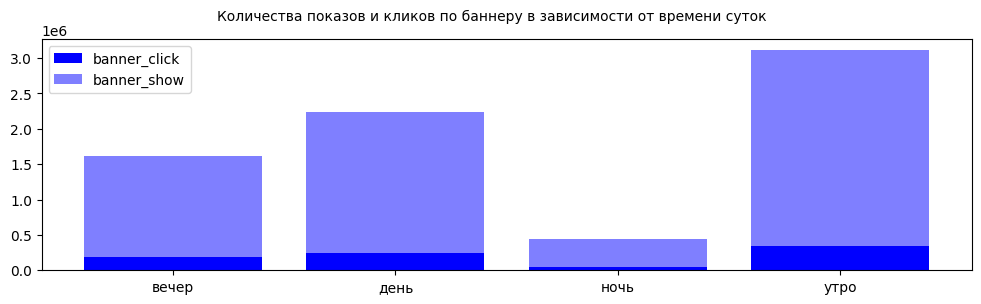

In [30]:
fig, ax = plt.subplots(figsize = (12, 3))
for i, name in zip(range(8), sorted(list(data["time_flag"].unique()))):
    ax.bar(name, d2.iloc[2*i], color = "blue", label = "banner_click" if i == 0 else None)
    ax.bar(name, d2.iloc[2*i + 1], color = "blue", alpha=0.5, label = "banner_show" if i == 0 else None)
ax.legend()
fig.suptitle("Количества показов и кликов по баннеру в зависимости от времени суток", fontsize = 10)
plt.show()

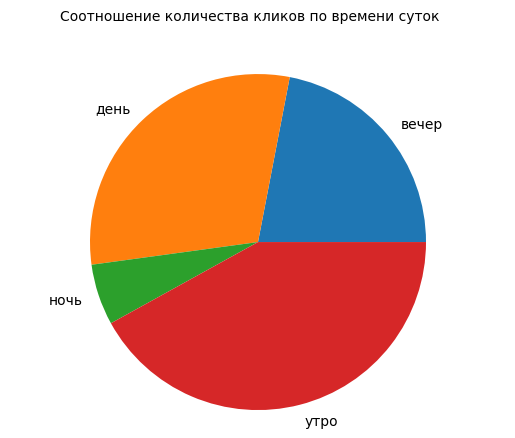

In [49]:
labels = sorted(list(data["time_flag"].unique()))
sizes = list(data[data["title"] == "banner_click"].groupby("time_flag")["title"].count()) 

plt.pie(sizes,labels=labels)

plt.axis('equal')
plt.suptitle("Соотношение количества кликов по времени суток", fontsize = 10)
plt.show()

Посмотрим, какой процент пользователей, делавших покупки, когда-либо кликал по баннерам (показывались они всем):

In [36]:
buyers_have_ever_clicked_ratio = (len(set(df[df["title"] == "banner_click"]["user"]) & set(df[df["title"] == "order"]["user"]))/
len(df[df["title"] == "order"]["user"].unique()) * 100)
print(f"buyers_have_ever_clicked_ratio: {round(buyers_have_ever_clicked_ratio, 2)}")

buyers_have_ever_clicked_ratio: 47.11


Посчитаем, какой процент пользователей из тех, кто когда-либо кликал по баннерам, когда-либо покупал что-то в магазине:

In [38]:
ever_clicked_to_buyers_ratio = (len(set(df[df["title"] == "banner_click"]["user"]) & set(df[df["title"] == "order"]["user"]))/
len(df[df["title"] == "banner_click"]["user"].unique()) * 100)
print(f"ever_clicked_to_buyers_ratio: {round(ever_clicked_to_buyers_ratio, 2)}")

ever_clicked_to_buyers_ratio: 15.09


Посмотрим на распределение покупок по продуктам:

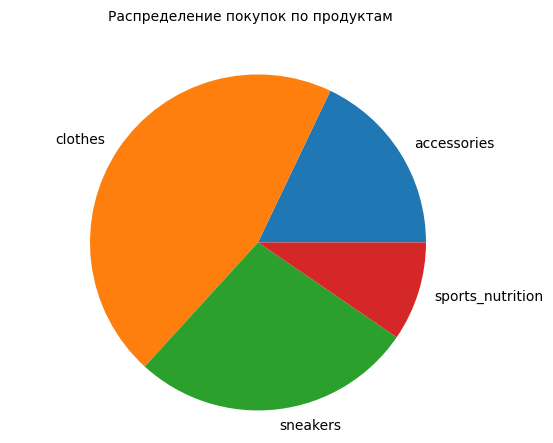

In [53]:
labels = sorted(list(df[df["title"] == "order"]["product"].unique()))
sizes = list(df[df["title"] == "order"].groupby("product")["title"].count())

plt.pie(sizes,labels=labels)

plt.axis('equal')
plt.suptitle("Распределение покупок по продуктам", fontsize = 10)
plt.show()